# Naive Bayes Classifier

In [1]:
import pandas as pd
import seaborn as sns; 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv('datasets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualize Dataset

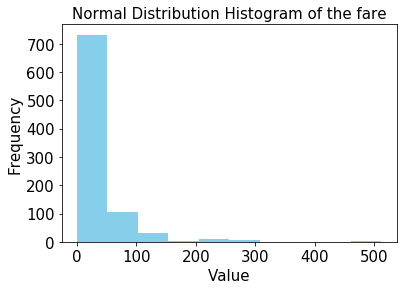

In [3]:
plt.figure(figsize=[6,4])
plt.hist(df['Fare'], color ='skyblue')
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normal Distribution Histogram of the fare',fontsize=15)
plt.show()

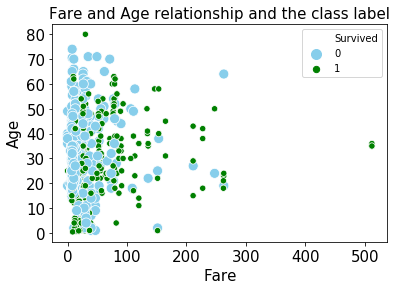

In [4]:
sns.scatterplot(x="Fare", y="Age", hue='Survived', size="Survived",palette=['skyblue','green']
                     , sizes=(40, 100), hue_norm=(0, 7), legend="full", data=df)
plt.xlabel('Fare',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.title('Fare and Age relationship and the class label',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

### Pre-processing 

In [5]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis='columns')

In [6]:
df['Embarked'].fillna('S', inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True) 

In [7]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])
df['Embarked'] = lb.fit_transform(df['Embarked'])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Split Dataset

In [9]:
X = df[['PassengerId','Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = df['Survived'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training and Testing

In [10]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [11]:
gnb.fit(X_train, y_train)
gnbpredictions = gnb.predict(X_test)

mnb.fit(X_train, y_train)
mnbpredictions = mnb.predict(X_test)

bnb.fit(X_train, y_train)
bnbpredictions = bnb.predict(X_test)

### Performance

In [12]:
print ("The GaussianNB accuracy: {}".format(accuracy_score(y_test, gnbpredictions)))
print ("The MultinomialNB accuracy: {}".format(accuracy_score(y_test, mnbpredictions)))
print ("The BernoulliNB accuracy: {}".format(accuracy_score(y_test, bnbpredictions)))

The GaussianNB accuracy: 0.7653631284916201
The MultinomialNB accuracy: 0.6089385474860335
The BernoulliNB accuracy: 0.7877094972067039
